In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1-mapa conectividad

subir archivo ver dupliacdod, nulos

In [20]:


# Ruta del archivo
file_path = "C:/Users/yanin/OneDrive/Desktop/proyecto 2/archivos/mapa_conectividad.xlsx"

# Cargar las hojas del archivo
xls = pd.ExcelFile(file_path)

# Mostrar los nombres de las hojas disponibles
print("Hojas disponibles:", xls.sheet_names)

# Cargar una hoja específica en un DataFrame (puedes cambiar el índice o nombre de la hoja)
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Verificar valores nulos en el dataset
nulos_mapa_conectividad = df.isnull().sum()

# Verificar duplicados en el dataset
duplicados_mapa_conectividad = df.duplicated().sum()

# Mostrar resultados
print("\nValores nulos por columna:\n", nulos_mapa_conectividad)
print("\nNúmero de filas duplicadas:", duplicados_mapa_conectividad)


Hojas disponibles: ['Hoja3']

Valores nulos por columna:
 Provincia          0
Partido            0
Localidad          0
Población          0
ADSL               0
Cablemódem         0
Dial Up            0
Fibra óptica       0
Satelital          0
Wireless           0
Telefonía Fija     0
3G                 0
4G                 0
Link              12
Latitud            0
Longitud           0
dtype: int64

Número de filas duplicadas: 0


solo tiene datos nulos en link
no hay datos duplicados

In [21]:


#  Detectar valores atípicos en la población usando IQR
Q1_pob = df["Población"].quantile(0.25)
Q3_pob = df["Población"].quantile(0.75)
IQR_pob = Q3_pob - Q1_pob

limite_inferior_pob = Q1_pob - 1.5 * IQR_pob
limite_superior_pob = Q3_pob + 1.5 * IQR_pob

outliers_pob = df[(df["Población"] < limite_inferior_pob) | 
                               (df["Población"] > limite_superior_pob)]

outliers_pob


Provincia          Partido          Localidad  Población ADSL  \
0     BUENOS AIRES       25 de Mayo         25 de Mayo      23408   SI   
11    BUENOS AIRES       9 de Julio         9 de Julio      36494   SI   
14    BUENOS AIRES  Almirante Brown            Adrogué      30271   SI   
15    BUENOS AIRES  Almirante Brown            Burzaco      92223   SI   
16    BUENOS AIRES  Almirante Brown           Claypole      44098   SI   
...            ...              ...                ...        ...  ...   
4216       CORDOBA        San Justo      San Francisco      61750   SI   
4231       NEUQUEN           Zapala             Zapala      32097   SI   
4270    SANTA CRUZ       Magallanes  Puerto San Julián       7894   SI   
4298      SANTA FE        San Justo          San Justo      21624   SI   
4304      SANTA FE      San Lorenzo   Capitán Bermúdez      29218   SI   

     Cablemódem Dial Up Fibra óptica Satelital Wireless Telefonía Fija  3G  \
0            SI      --           --        SI       SI             SI  SI   
11           SI      SI           SI        --       SI             SI  SI   
14           SI      SI           SI        SI       SI             SI  SI   
15           SI      SI           SI        SI       SI             SI  SI   
16           SI      SI           SI        --       SI             SI  SI   
...         ...     ...          ...       ...      ...            ...  ..   
4216         SI      --           SI        --       SI             SI  SI   
4231         --      SI           SI        SI       SI             SI  SI   
4270         SI      SI           SI        SI       SI             SI  SI   
4298         SI      --           SI        --       SI             SI  SI   
4304         SI      --           SI        --       --             SI  SI   

      4G        Link    Latitud   Longitud  
0     SI   6854100.0 -35.433939 -60.173121  
11    SI   6588100.0 -35.444744 -60.884343  
14    SI   6028010.0 -34.801558 -58.391468  
15    SI   6028010.0 -34.831542 -58.398687  
16    SI   6028010.0 -34.804476 -58.344783  
...   ..         ...        ...        ...  
4216  SI  14140360.0 -31.427609 -62.086634  
4231  SI  58112040.0 -38.896169 -70.066855  
4270  SI  78042010.0 -49.307704 -67.731970  
4298  SI  82112130.0 -30.790867 -60.594037  
4304  SI  82119020.0 -32.828235 -60.716821  

[679 rows x 16 columns]

Se detectaron 679 registros con valores extremos en la columna "Población".
Estos valores pueden corresponder a localidades con poblaciones mucho mayores o menores al promedio.

In [22]:


# Mostrar las primeras filas
df.head()


Provincia     Partido          Localidad  Población ADSL Cablemódem  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo      23408   SI         SI   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi        280   --         --   
2  BUENOS AIRES  25 de Mayo          Del Valle        899   SI         --   
3  BUENOS AIRES  25 de Mayo          Ernestina        145   SI         --   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte        547   --         --   

  Dial Up Fibra óptica Satelital Wireless Telefonía Fija  3G  4G       Link  \
0      --           --        SI       SI             SI  SI  SI  6854100.0   
1      --           --        --       --             SI  --  --  6854010.0   
2      --           --        SI       --             --  SI  --  6854020.0   
3      --           --        --       --             SI  --  --  6854030.0   
4      --           --        --       SI             --  --  --  6854040.0   

     Latitud   Longitud  
0 -35.433939 -60.173121  
1 -35.739217 -60.559063  
2 -35.897345 -60.731609  
3 -35.270234 -59.557503  
4 -35.164397 -60.081358

In [23]:
# Revisar información general del dataset
info = df.info()

# Revisar valores únicos en las columnas de conectividad
connectivity_columns = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 
                        'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']
unique_values = {col: df[col].unique() for col in connectivity_columns}

# Resumen estadístico de las columnas numéricas
stats = df.describe()

info, unique_values, stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4305 non-null   object 
 1   Partido         4305 non-null   object 
 2   Localidad       4305 non-null   object 
 3   Población       4305 non-null   int64  
 4   ADSL            4305 non-null   object 
 5   Cablemódem      4305 non-null   object 
 6   Dial Up         4305 non-null   object 
 7   Fibra óptica    4305 non-null   object 
 8   Satelital       4305 non-null   object 
 9   Wireless        4305 non-null   object 
 10  Telefonía Fija  4305 non-null   object 
 11  3G              4305 non-null   object 
 12  4G              4305 non-null   object 
 13  Link            4293 non-null   float64
 14  Latitud         4305 non-null   float64
 15  Longitud        4305 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 538.3+ KB


(None,
 {'ADSL': array(['SI', '--'], dtype=object),
  'Cablemódem': array(['SI', '--'], dtype=object),
  'Dial Up': array(['--', 'SI'], dtype=object),
  'Fibra óptica': array(['--', 'SI'], dtype=object),
  'Satelital': array(['SI', '--'], dtype=object),
  'Wireless': array(['SI', '--'], dtype=object),
  'Telefonía Fija': array(['SI', '--'], dtype=object),
  '3G': array(['SI', '--'], dtype=object),
  '4G': array(['SI', '--'], dtype=object)},
           Población          Link      Latitud     Longitud
 count  4.305000e+03  4.293000e+03  4305.000000  4305.000000
 mean   8.707207e+03  3.908916e+07   -32.263116   -63.039292
 std    3.824490e+04  2.939911e+07     5.001839     3.829679
 min    0.000000e+00  2.000010e+06   -77.874009   -72.891627
 25%    1.170000e+02  1.009104e+07   -34.708542   -65.686443
 50%    5.790000e+02  3.400705e+07   -32.286202   -63.450636
 75%    3.217000e+03  6.612603e+07   -28.583403   -60.009923
 max    1.317298e+06  9.401402e+07   -21.817293   -34.626560)

El rango es muy amplio (desde 0 hasta más de 1.3 millones).
La media es de ~8700 habitantes, pero la desviación estándar es alta (~38,000), lo que indica que hay grandes diferencias entre localidades.

In [24]:
# Convertir variables de conectividad a valores numéricos (1 = SI, 0 = --)
for col in connectivity_columns:
    df[col] = df[col].map({'SI': 1, '--': 0})

# Verificar la conversión
df.head()


Provincia     Partido          Localidad  Población  ADSL  Cablemódem  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo      23408     1           1   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi        280     0           0   
2  BUENOS AIRES  25 de Mayo          Del Valle        899     1           0   
3  BUENOS AIRES  25 de Mayo          Ernestina        145     1           0   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte        547     0           0   

   Dial Up  Fibra óptica  Satelital  Wireless  Telefonía Fija  3G  4G  \
0        0             0          1         1               1   1   1   
1        0             0          0         0               1   0   0   
2        0             0          1         0               0   1   0   
3        0             0          0         0               1   0   0   
4        0             0          0         1               0   0   0   

        Link    Latitud   Longitud  
0  6854100.0 -35.433939 -60.173121  
1  6854010.0 -35.739217 -60.559063  
2  6854020.0 -35.897345 -60.731609  
3  6854030.0 -35.270234 -59.557503  
4  6854040.0 -35.164397 -60.081358

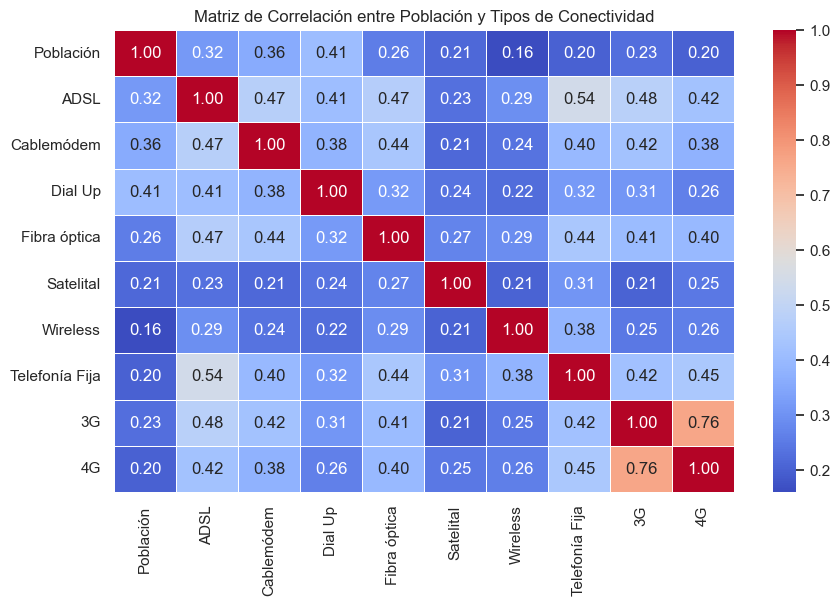

In [25]:
# Calcular la matriz de correlación
correlation_matrix = df[['Población'] + connectivity_columns].corr()

# Filtrar solo las correlaciones con "Población"
correlation_population = correlation_matrix["Población"].sort_values(ascending=False)

correlation_population


# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un heatmap de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Título del gráfico
plt.title("Matriz de Correlación entre Población y Tipos de Conectividad")

# Mostrar el gráfico
plt.show()



Dial Up (0.41): Es la conectividad más correlacionada con la población, lo cual es curioso porque es una tecnología antigua. Puede ser que todavía esté presente en localidades grandes que no tienen alternativas modernas en ciertas zonas.
Cablemódem (0.36) y ADSL (0.32): Son tecnologías con una relación positiva con la población, lo que indica que es más probable encontrarlas en localidades más grandes.
Fibra óptica (0.26): También tiene una correlación positiva, aunque más baja. Esto sugiere que, aunque la fibra óptica está en ciudades más grandes, no siempre está disponible.
3G (0.23) y 4G (0.20): Tienen una correlación positiva moderada, lo que sugiere que las redes móviles están algo más extendidas en lugares con mayor población.
Wireless (0.16): Tiene la correlación más baja, lo que indica que su disponibilidad no depende tanto del tamaño de la localidad.
Satelital (0.21): También es baja, lo que concuerda con la idea de que esta tecnología se usa más en zonas rurales o con poca conectividad.

In [26]:
import folium

# Crear un mapa centrado en Argentina
m = folium.Map(location=[-38.4161, -63.6167], zoom_start=5)

# Función para determinar el color según la conectividad predominante
def get_color(row):
    if row["Fibra óptica"] == 1:
        return "green"  # Verde para fibra óptica
    elif row["Cablemódem"] == 1:
        return "blue"  # Azul para cablemódem
    elif row["ADSL"] == 1:
        return "orange"  # Naranja para ADSL
    elif row["Wireless"] == 1:
        return "purple"  # Púrpura para Wireless
    elif row["Satelital"] == 1:
        return "gray"  # Gris para Satelital
    else:
        return "red"  # Rojo si no tiene ninguna conectividad importante

# Agregar puntos al mapa
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitud"], row["Longitud"]],
        radius=3,
        color=get_color(row),
        fill=True,
        fill_color=get_color(row),
        fill_opacity=0.6,
        popup=f"{row['Localidad']} - {row['Provincia']}<br>Población: {row['Población']}",
    ).add_to(m)

# Mostrar mapa
m


-Las grandes ciudades y localidades con mayor población suelen tener acceso a tecnologías más avanzadas como fibra óptica, cablemódem y ADSL.
-En localidades más pequeñas y zonas rurales, la conectividad depende más de tecnologías como wireless y satelital, aunque en algunos casos solo hay acceso a redes móviles (3G o 4G).-
-se detectó la presencia de Dial Up, lo que indica que en ciertas localidades todavía se usan conexiones antiguas debido a la falta de alternativas modernas.
-Las redes 3G y 4G están disponibles en muchas localidades, pero su cobertura es más frecuente en áreas urbanas.
-En algunas regiones rurales, la única opción de conectividad es satelital o wireless, lo que puede indicar problemas de acceso a infraestructuras de telecomunicaciones más robustas.
-Existen localidades con alta población pero sin acceso a fibra óptica, lo que podría indicar desafíos en la expansión de infraestructura.
-Las zonas sin acceso a ningún tipo de conectividad terrestre dependen únicamente de soluciones móviles o satelitales, lo que puede afectar la calidad del servicio y los costos.

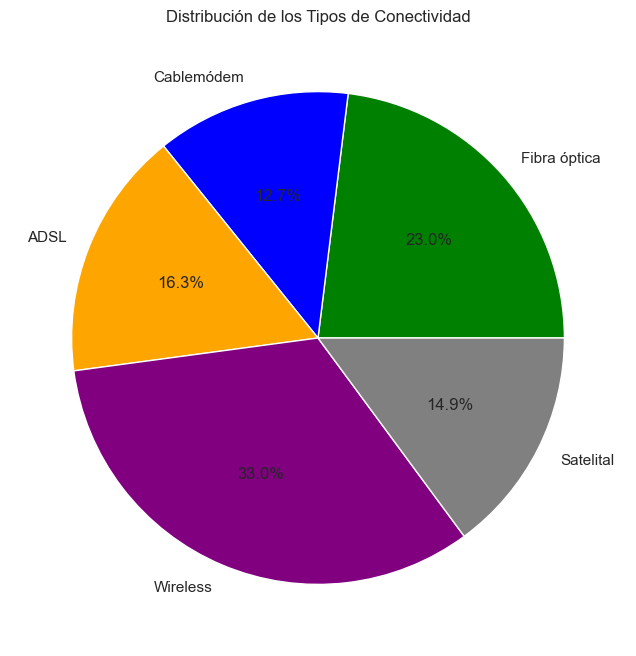

In [27]:


# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de torta - Distribución de tipos de conectividad
conectividad_counts = df[["Fibra óptica", "Cablemódem", "ADSL", "Wireless", "Satelital"]].sum()
plt.figure(figsize=(8, 8))
plt.pie(conectividad_counts, labels=conectividad_counts.index, autopct='%1.1f%%', colors=['green', 'blue', 'orange', 'purple', 'gray'])
plt.title("Distribución de los Tipos de Conectividad")
plt.show()





-Se observa que algunos tipos de conectividad, como fibra óptica y cablemódem, tienen una presencia significativa en el país.
-ADSL y Wireless todavía son comunes en varias localidades, lo que indica que hay muchas zonas que no han migrado a tecnologías más avanzadas.
-La conectividad satelital es la menos frecuente, lo que sugiere que solo se usa en zonas remotas donde no hay infraestructura terrestre disponible.

C:\Users\yanin\AppData\Local\Temp\ipykernel_9888\1900796934.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Tipo de Conectividad", y="Población", data=df_melted, palette="Set2")


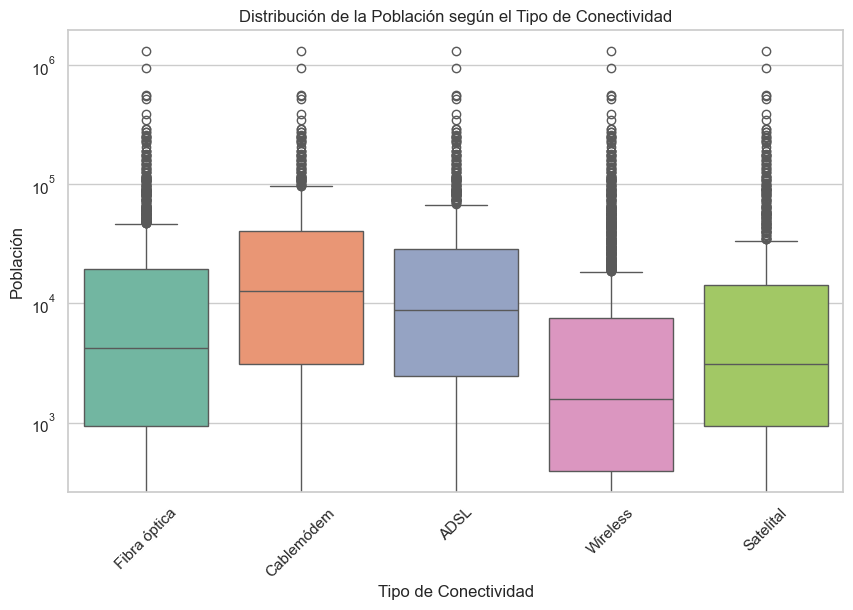

In [28]:
#  Boxplot - Distribución de población según tipo de conectividad
df_melted = df.melt(id_vars=["Población"], value_vars=["Fibra óptica", "Cablemódem", "ADSL", "Wireless", "Satelital"],
                    var_name="Tipo de Conectividad", value_name="Presente")
df_melted = df_melted[df_melted["Presente"] == 1]  # Solo considerar localidades donde el tipo de conectividad está presente

plt.figure(figsize=(10, 6))
sns.boxplot(x="Tipo de Conectividad", y="Población", data=df_melted, palette="Set2")
plt.yscale("log")  # Escala logarítmica para mejor visualización
plt.xticks(rotation=45)
plt.title("Distribución de la Población según el Tipo de Conectividad")
plt.show()

-Fibra óptica y cablemódem están más presentes en localidades con mayor población, lo que sugiere que estas tecnologías están mejor desarrolladas en ciudades grandes.
-Wireless y Satelital están más presentes en localidades pequeñas, lo que indica que son las principales opciones en zonas rurales con menor densidad de población.
-La dispersión de ADSL es amplia, lo que muestra que todavía es utilizado en distintos tamaños de localidades, aunque es una tecnología en declive

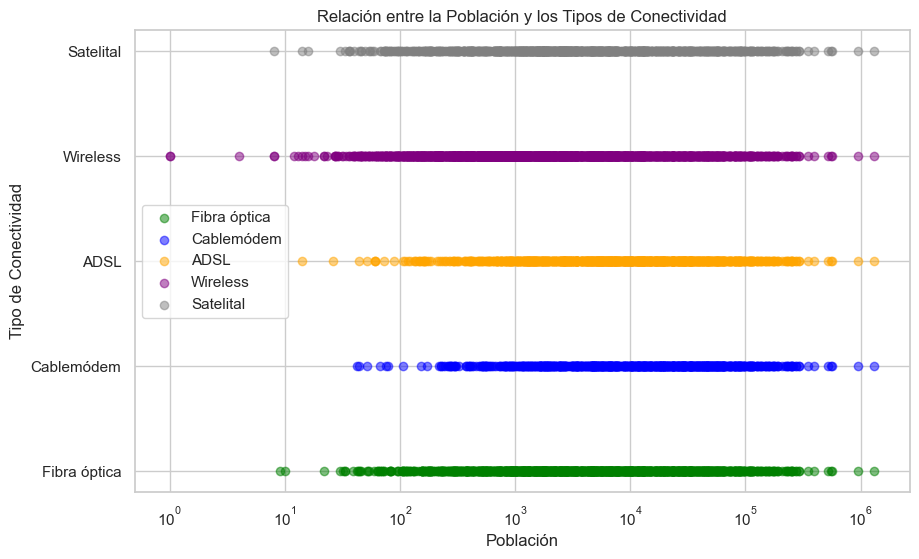

In [29]:

# Gráfico de dispersión - Relación entre población y conectividad
plt.figure(figsize=(10, 6))
for tipo, color in zip(["Fibra óptica", "Cablemódem", "ADSL", "Wireless", "Satelital"], ['green', 'blue', 'orange', 'purple', 'gray']):
    subset = df[df[tipo] == 1]
    plt.scatter(subset["Población"], [tipo] * len(subset), alpha=0.5, label=tipo, color=color)

plt.xscale("log")  # Escala logarítmica para visualizar mejor
plt.xlabel("Población")
plt.ylabel("Tipo de Conectividad")
plt.title("Relación entre la Población y los Tipos de Conectividad")
plt.legend()
plt.show()

-Las localidades con poca población dependen más de tecnologías como Wireless y Satelital, lo que puede afectar la calidad del servicio.
-Fibra óptica y Cablemódem están concentradas en localidades con mayor población, lo que confirma que su despliegue se enfoca en centros urbanos.
-No hay una transición clara en algunas localidades medianas, lo que puede indicar que hay un vacío en la modernización de la infraestructura en ciertas regiones.

2- portabilidad

In [ ]:


# Cargar el archivo Excel
file_path = "C:/Users/yanin/OneDrive/Desktop/proyecto 2/archivos/Portabilidad.xlsx"
df_portabilidad = pd.read_excel(file_path)

# Mostrar las primeras filas del dataset
df_portabilidad.head()


Año  Mes  Total general
0  2024    6         178024
1  2024    5         178256
2  2024    4         155812
3  2024    3         149604
4  2024    2         145787

In [ ]:

#  Búsqueda de valores duplicados
duplicados = df_portabilidad.duplicated().sum()

#  Identificación de valores atípicos usando el método de los cuartiles (IQR)
Q1 = df_portabilidad["Total general"].quantile(0.25)
Q3 = df_portabilidad["Total general"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df_portabilidad[(df_portabilidad["Total general"] < limite_inferior) | 
                            (df_portabilidad["Total general"] > limite_superior)]

# Mostrar resultados
duplicados, outliers


(np.int64(0),
 Empty DataFrame
 Columns: [Año, Mes, Total general]
 Index: [])

-No hay registros duplicados en los datos, lo que indica que no hay problemas de redundancia en los registros
- No se encontraron valores atípicos en la variable "Total general" utilizando el método del rango intercuartílico (IQR). Esto sugiere que la distribución de los datos es bastante estable y no hay valores extremos que distorsionen el análisis.

In [ ]:

# Resumen estadístico
resumen_estadistico = df_portabilidad.describe()

# Verificar valores nulos
valores_nulos = df_portabilidad.isnull().sum()

# Convertir Año y Mes en un solo campo de fecha para análisis temporal


df_portabilidad["Fecha"] = pd.to_datetime(df_portabilidad[["Año", "Mes"]].rename(columns={"Año": "year", "Mes": "month"}).assign(day=1))



resumen_estadistico, valores_nulos


(               Año         Mes  Total general
 count   148.000000  148.000000     148.000000
 mean   2017.837838    6.445946  159260.993243
 std       3.587685    3.437060   95330.547558
 min    2012.000000    1.000000     153.000000
 25%    2015.000000    3.750000   95727.250000
 50%    2018.000000    6.000000  144530.500000
 75%    2021.000000    9.000000  235856.750000
 max    2024.000000   12.000000  377682.000000,
 Año              0
 Mes              0
 Total general    0
 dtype: int64)

El dataset tiene 148 registros, lo que indica que cubre más de 12 años de datos de portabilidad.
La cantidad promedio de portabilidades mensuales es de 159,261, con un mínimo de 153 y un máximo de 377,682.
El año más antiguo registrado es 2012 y el más reciente es 2024.
No hay valores nulos en el dataset.

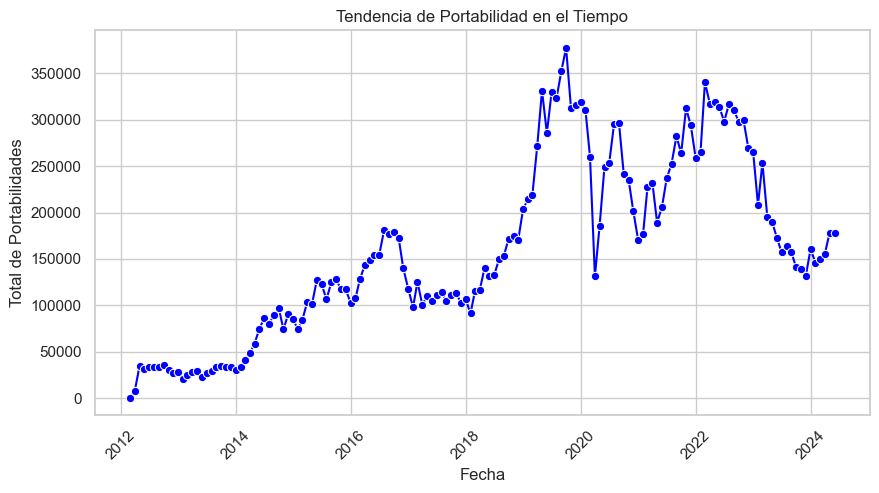

In [ ]:
# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de tendencia de portabilidad en el tiempo
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_portabilidad, x="Fecha", y="Total general", marker="o", color="blue")
plt.title("Tendencia de Portabilidad en el Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Total de Portabilidades")
plt.xticks(rotation=45)
plt.show()

-Se observa un crecimiento general en la cantidad de portabilidades con el paso de los años.
Hubo períodos de rápido crecimiento, lo que podría estar relacionado con cambios en regulaciones, -promociones o mejoras en la competencia entre empresas.
-También hay meses donde las portabilidades disminuyen, lo que podría deberse a factores estacionales o a estabilidad en las compañías de telecomunicaciones.


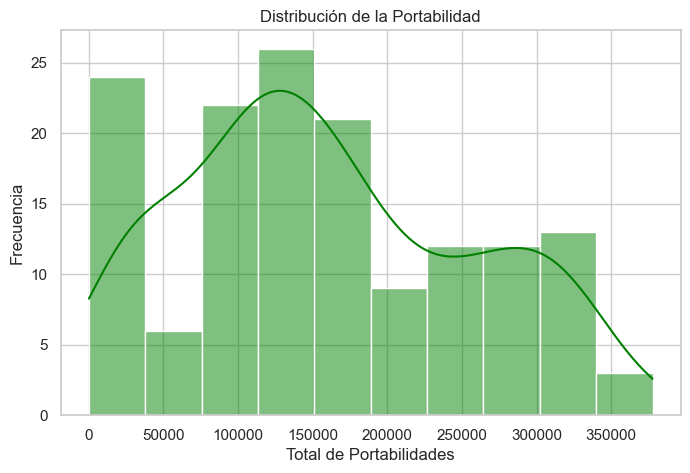

In [ ]:
# Histograma de distribución de portabilidad
plt.figure(figsize=(8, 5))
sns.histplot(df_portabilidad["Total general"], bins=10, kde=True, color="green")
plt.title("Distribución de la Portabilidad")
plt.xlabel("Total de Portabilidades")
plt.ylabel("Frecuencia")
plt.show()


-La distribución no es uniforme: hay más meses con portabilidades bajas a moderadas, mientras que los valores más altos son menos frecuentes.
-Esto sugiere que la portabilidad tuvo un incremento progresivo con picos en ciertos períodos

C:\Users\yanin\AppData\Local\Temp\ipykernel_9888\4151786250.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sheets[sheet_name] = df.applymap(lambda x: 1 if str(x).strip().lower() == "sí" else (0 if pd.isna(x) else x))


ModuleNotFoundError: No module named 'xlsxwriter'

3-SERVICIOS POSTALES

In [ ]:

# Ruta del archivo
file_path = "C:/Users/yanin/OneDrive/Desktop/proyecto 2/archivos/servicios_postales.xlsx"

# Cargar el archivo Excel
xls = pd.ExcelFile(file_path)

# Obtener los nombres de las hojas
sheet_names = xls.sheet_names
sheet_names


['ventas_postales',
 'ventas_telegraficas',
 'venta_monetarios',
 'ventas_unidades_provincias',
 'personal_ocupado',
 'unidades_postales',
 'unidades_telegraficas',
 'unidades_monetarios']

4- TELEFONIA FIJA

In [ ]:
# Ruta del nuevo archivo
file_path_telefonia = "C:/Users/yanin/OneDrive/Desktop/proyecto 2/archivos/telefonia_fija.xlsx"

# Cargar el archivo Excel
xls_telefonia = pd.ExcelFile(file_path_telefonia)

# Obtener los nombres de las hojas
sheet_names_telefonia = xls_telefonia.sheet_names
sheet_names_telefonia


['Fija_prov_tipo',
 'Fija_accesos_tot',
 'Fija_penetracion_prov',
 'Fija_penetracion_tot',
 'Fija_ingresos']

In [ ]:
# Cargar los datos de las hojas seleccionadas
df_fija_penetracion_tot = xls_telefonia.parse("Fija_penetracion_tot")
df_fija_ingresos = xls_telefonia.parse("Fija_ingresos")

# Mostrar las primeras filas de cada hoja para entender su estructura
df_fija_penetracion_tot.head(), df_fija_ingresos.head()


(    Año  Trimestre  Accesos telefonía fija por cada 100 hab  \
 0  2024          2                                14.291425   
 1  2024          1                                14.719928   
 2  2023          4                                15.440544   
 3  2023          3                                15.694047   
 4  2023          2                                15.809957   
 
    Accesos telefonía fija por cada 100 hogares  
 0                                    45.442151  
 1                                    46.848116  
 2                                    49.696153  
 3                                    50.552590  
 4                                    50.965804  ,
     Año  Trimestre  Ingresos (miles de $)
 0  2014          1            2916071.754
 1  2014          2            2974865.204
 2  2014          3            3105462.022
 3  2014          4            3339690.895
 4  2015          1            3260124.752)

In [ ]:
# Búsqueda de valores faltantes
missing_values_penetracion = df_fija_penetracion_tot.isnull().sum()
missing_values_ingresos = df_fija_ingresos.isnull().sum()

# Búsqueda de registros duplicados
duplicates_penetracion = df_fija_penetracion_tot.duplicated().sum()
duplicates_ingresos = df_fija_ingresos.duplicated().sum()

# Detección de valores atípicos usando el método de rango intercuartílico (IQR)
def detectar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_penetracion_hab = detectar_outliers(df_fija_penetracion_tot, "Accesos telefonía fija por cada 100 hab")
outliers_penetracion_hog = detectar_outliers(df_fija_penetracion_tot, "Accesos telefonía fija por cada 100 hogares")
outliers_ingresos = detectar_outliers(df_fija_ingresos, "Ingresos (miles de $)")

# Resultados
missing_values_penetracion, missing_values_ingresos, duplicates_penetracion, duplicates_ingresos, outliers_penetracion_hab, outliers_penetracion_hog, outliers_ingresos


(Año                                            0
 Trimestre                                      0
 Accesos telefonía fija por cada 100 hab        0
 Accesos telefonía fija por cada 100 hogares    0
 dtype: int64,
 Año                      0
 Trimestre                0
 Ingresos (miles de $)    0
 dtype: int64,
 np.int64(0),
 np.int64(0),
 Empty DataFrame
 Columns: [Año, Trimestre, Accesos telefonía fija por cada 100 hab, Accesos telefonía fija por cada 100 hogares]
 Index: [],
 Empty DataFrame
 Columns: [Año, Trimestre, Accesos telefonía fija por cada 100 hab, Accesos telefonía fija por cada 100 hogares]
 Index: [],
      Año  Trimestre  Ingresos (miles de $)
 37  2023          2           6.456039e+07
 39  2023          4           6.266332e+07
 40  2024          1           1.426623e+08
 41  2024          2           1.924084e+08)

1. Valores Faltantes
No se encontraron valores faltantes en ninguna de las dos hojas analizadas.

2. Registros Duplicados
No se encontraron registros duplicados en los datos.

3. Valores Atípicos (Outliers)
Accesos de telefonía fija: No se detectaron valores atípicos en las variables de accesos por 100 habitantes ni por 100 hogares.
Ingresos: Se detectaron 4 valores atípicos en los ingresos de los trimestres recientes:
2023 Q2: $64.56 millones
2023 Q4: $62.66 millones
2024 Q1: $142.66 millones
2024 Q2: $192.41 millones

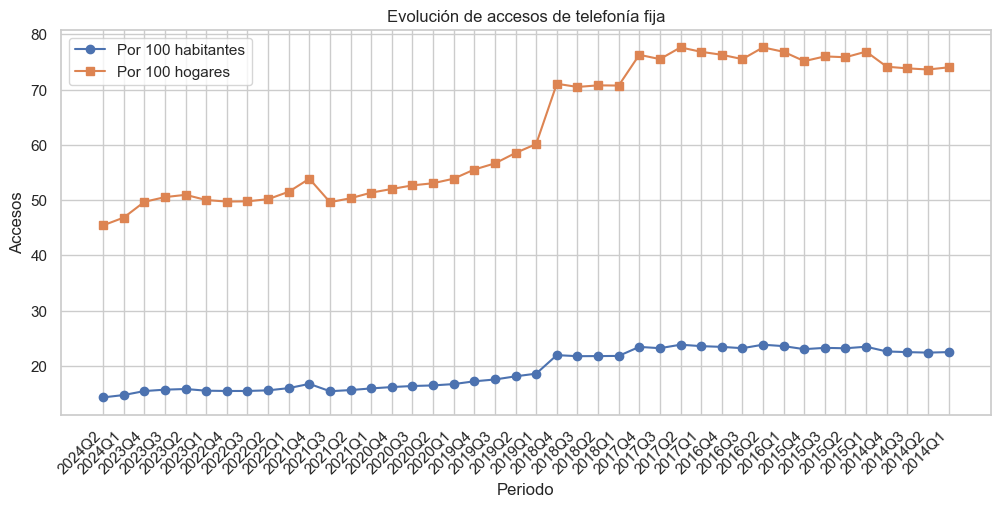

Año  Trimestre  Accesos telefonía fija por cada 100 hab  \
count    42.000000  42.000000                                42.000000   
mean   2018.761905   2.452381                                19.357188   
std       3.074756   1.130560                                 3.544160   
min    2014.000000   1.000000                                14.291425   
25%    2016.000000   1.250000                                15.837317   
50%    2019.000000   2.000000                                18.349007   
75%    2021.000000   3.000000                                23.145359   
max    2024.000000   4.000000                                23.832910   

       Accesos telefonía fija por cada 100 hogares  
count                                    42.000000  
mean                                     62.810319  
std                                      11.921882  
min                                      45.442151  
25%                                      51.064029  
50%                                      59.354487  
75%                                      75.440797  
max                                      77.653934

In [ ]:


# Configuración de estilo
sns.set_style("whitegrid")

# Estadísticas descriptivas
stats_penetracion = df_fija_penetracion_tot.describe()


# Gráfico de evolución de accesos por cada 100 habitantes y hogares
plt.figure(figsize=(12, 5))
plt.plot(df_fija_penetracion_tot["Año"].astype(str) + "Q" + df_fija_penetracion_tot["Trimestre"].astype(str),
         df_fija_penetracion_tot["Accesos telefonía fija por cada 100 hab"], marker="o", label="Por 100 habitantes")
plt.plot(df_fija_penetracion_tot["Año"].astype(str) + "Q" + df_fija_penetracion_tot["Trimestre"].astype(str),
         df_fija_penetracion_tot["Accesos telefonía fija por cada 100 hogares"], marker="s", label="Por 100 hogares")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Periodo")
plt.ylabel("Accesos")
plt.title("Evolución de accesos de telefonía fija")
plt.legend()
plt.show()


stats_penetracion


-Se observa una tendencia descendente en los accesos de telefonía fija tanto por cada 100 habitantes como por cada 100 hogares.
-La disminución es sostenida a lo largo del tiempo, lo que sugiere que el servicio ha ido perdiendo relevancia, posiblemente debido al crecimiento de la telefonía móvil y otras tecnologías de comunicación.

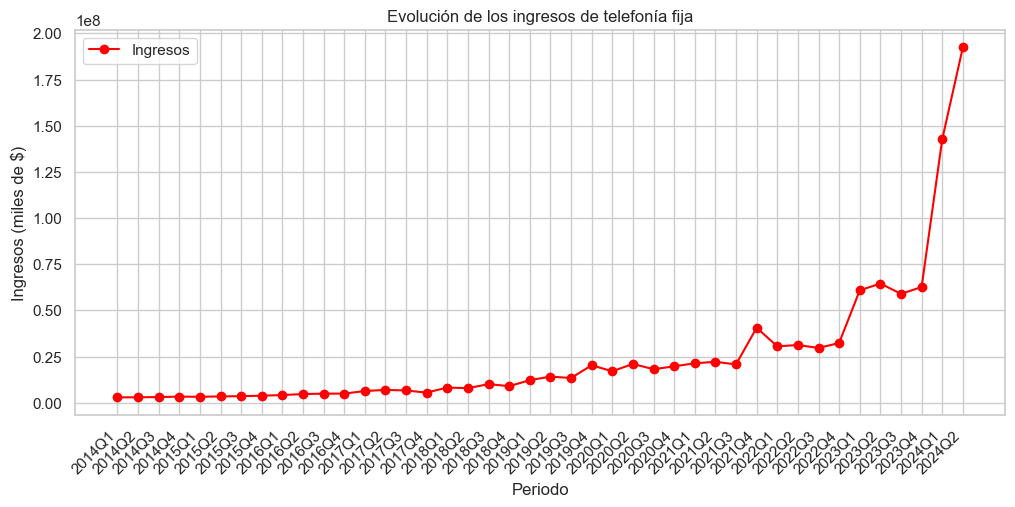

Año  Trimestre  Ingresos (miles de $)
count    42.000000  42.000000           4.200000e+01
mean   2018.761905   2.452381           2.507723e+07
std       3.074756   1.130560           3.701216e+07
min    2014.000000   1.000000           2.916072e+06
25%    2016.000000   1.250000           4.955125e+06
50%    2019.000000   2.000000           1.282157e+07
75%    2021.000000   3.000000           2.781857e+07
max    2024.000000   4.000000           1.924084e+08

In [ ]:
stats_ingresos = df_fija_ingresos.describe()
# Gráfico de evolución de ingresos
plt.figure(figsize=(12, 5))
plt.plot(df_fija_ingresos["Año"].astype(str) + "Q" + df_fija_ingresos["Trimestre"].astype(str),
         df_fija_ingresos["Ingresos (miles de $)"], marker="o", color="red", label="Ingresos")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Periodo")
plt.ylabel("Ingresos (miles de $)")
plt.title("Evolución de los ingresos de telefonía fija")
plt.legend()
plt.show()

stats_ingresos

-A diferencia de los accesos, los ingresos no muestran una tendencia claramente descendente.
-Se observan fluctuaciones significativas, con algunos picos en determinados trimestres.
-Esto indica que, aunque el número de accesos ha disminuido, el sector aún genera ingresos considerables, lo que podría explicarse por ajustes en tarifas o cambios en los servicios ofrecidos.

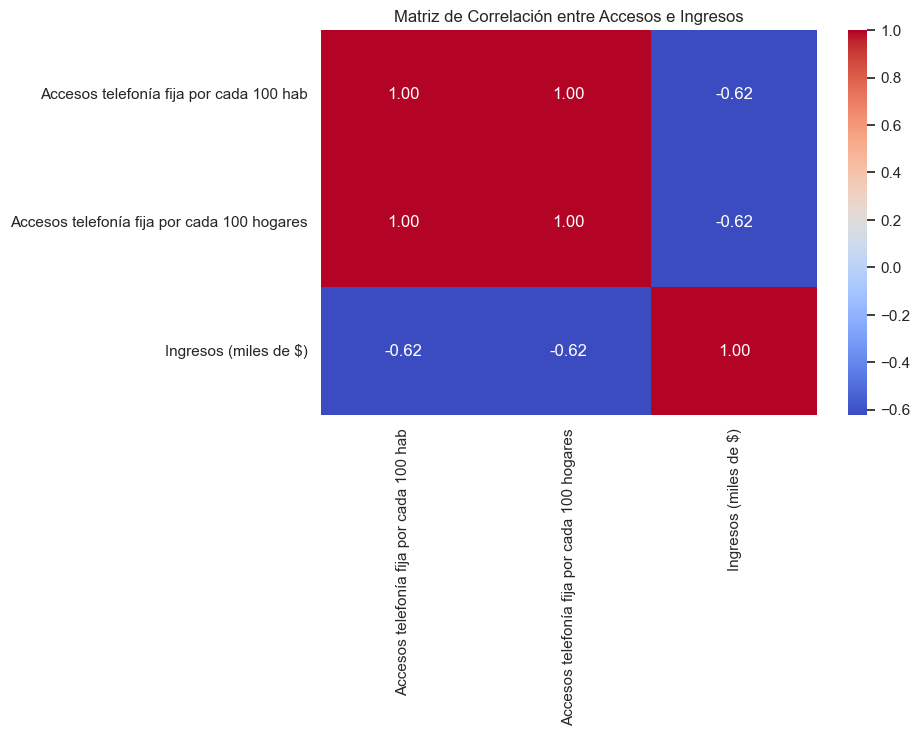

Accesos telefonía fija por cada 100 hab  \
Accesos telefonía fija por cada 100 hab                                     1.000000   
Accesos telefonía fija por cada 100 hogares                                 0.999783   
Ingresos (miles de $)                                                      -0.618231   

                                             Accesos telefonía fija por cada 100 hogares  \
Accesos telefonía fija por cada 100 hab                                         0.999783   
Accesos telefonía fija por cada 100 hogares                                     1.000000   
Ingresos (miles de $)                                                          -0.623357   

                                             Ingresos (miles de $)  
Accesos telefonía fija por cada 100 hab                  -0.618231  
Accesos telefonía fija por cada 100 hogares              -0.623357  
Ingresos (miles de $)                                     1.000000

In [ ]:
# Análisis de correlación entre accesos y ingresos

# Unir las dos bases de datos por Año y Trimestre
df_merged = pd.merge(df_fija_penetracion_tot, df_fija_ingresos, on=["Año", "Trimestre"])

# Calcular correlaciones
correlation_matrix = df_merged[["Accesos telefonía fija por cada 100 hab", 
                                "Accesos telefonía fija por cada 100 hogares", 
                                "Ingresos (miles de $)"]].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Accesos e Ingresos")
plt.show()

correlation_matrix


-Existe una fuerte correlación positiva (0.999) entre los accesos por 100 habitantes y por 100 hogares, lo cual era esperado.
-Hay una correlación negativa moderada entre los accesos de telefonía fija y los ingresos:
*Accesos por 100 habitantes vs. Ingresos: -0.618
*accesos por 100 hogares vs. Ingresos: -0.623
-Esto indica que, a medida que disminuyen los accesos de telefonía fija, los ingresos han aumentado, lo que sugiere que el aumento en precios o el cambio en patrones de consumo han compensado la pérdida de accesos.

5- TELEFONIA MOVIL

In [ ]:


# Cargar el archivo de Telefonía Móvil
file_path_movil =  "C:/Users/yanin/OneDrive/Desktop/proyecto 2/archivos/Telefonia_movil.xlsx"

# Obtener nombres de las hojas
xls_movil = pd.ExcelFile(file_path_movil)
xls_movil.sheet_names


['SMS',
 'Llamadas salientes',
 'Minutos salientes',
 'Ingresos',
 'Penetracion',
 'Accesos',
 'Hoja1']

In [ ]:
# Cargar datos de las hojas "Ingresos" y "Penetracion"
df_ingresos_movil = pd.read_excel(xls_movil, sheet_name="Ingresos")
df_penetracion_movil = pd.read_excel(xls_movil, sheet_name="Penetracion")

# Mostrar información general de las hojas
info_ingresos = df_ingresos_movil.info()
info_penetracion = df_penetracion_movil.info()

# Ver las primeras filas de cada hoja
head_ingresos = df_ingresos_movil.head()
head_penetracion = df_penetracion_movil.head()

# Resumen estadístico
stats_ingresos_movil = df_ingresos_movil.describe()
stats_penetracion_movil = df_penetracion_movil.describe()

info_ingresos, info_penetracion, head_ingresos, head_penetracion, stats_ingresos_movil, stats_penetracion_movil


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    46 non-null     int64 
 1   Trimestre              46 non-null     int64 
 2   Ingresos (miles de $)  46 non-null     int64 
 3   Periodo                46 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       46 non-null     int64  
 1   Trimestre                 46 non-null     int64  
 2   Accesos por cada 100 hab  46 non-null     float64
 3   Periodo                   46 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ KB


(None,
 None,
     Año  Trimestre  Ingresos (miles de $)        Periodo
 0  2013          1               13135235   Ene-Mar 2013
 1  2013          2               13970806   Abr-Jun 2013
 2  2013          3               15235659  Jul-Sept 2013
 3  2013          4               16218846   Oct-Dic 2013
 4  2014          1               15938353   Ene-Mar 2013,
     Año  Trimestre  Accesos por cada 100 hab        Periodo
 0  2013          1                    154.37   Ene-Mar 2013
 1  2013          2                    156.00   Abr-Jun 2013
 2  2013          3                    158.59  Jul-Sept 2013
 3  2013          4                    159.37   Oct-Dic 2013
 4  2014          1                    148.07   Ene-Mar 2014,
                Año  Trimestre  Ingresos (miles de $)
 count    46.000000  46.000000           4.600000e+01
 mean   2018.260870   2.456522           1.224360e+08
 std       3.362769   1.129533           2.069793e+08
 min    2013.000000   1.000000           1.313524e+07


In [ ]:

# Búsqueda de valores faltantes
missing_values_ingresos = df_ingresos_movil.isnull().sum()
missing_values_penetracion = df_penetracion_movil.isnull().sum()

# Búsqueda de registros duplicados
duplicates_ingresos = df_ingresos_movil.duplicated().sum()
duplicates_penetracion = df_penetracion_movil.duplicated().sum()

# Búsqueda de valores atípicos usando el método del rango intercuartil (IQR)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar valores atípicos en ingresos y penetración
outliers_ingresos = detect_outliers(df_ingresos_movil, "Ingresos (miles de $)")
outliers_penetracion = detect_outliers(df_penetracion_movil, "Accesos por cada 100 hab")

# Resultados
missing_values_ingresos, missing_values_penetracion, duplicates_ingresos, duplicates_penetracion, outliers_ingresos, outliers_penetracion


(Año                      0
 Trimestre                0
 Ingresos (miles de $)    0
 Periodo                  0
 dtype: int64,
 Año                         0
 Trimestre                   0
 Accesos por cada 100 hab    0
 Periodo                     0
 dtype: int64,
 np.int64(0),
 np.int64(0),
      Año  Trimestre  Ingresos (miles de $)        Periodo
 40  2023          1              257558366   Ene-Mar 2023
 41  2023          2              307337085   Abr-Jun 2023
 42  2023          3              380119973  Jul-Sept 2023
 43  2023          4              515335742   Oct-Dic 2023
 44  2024          1              769485386   Ene-Mar 2024
 45  2024          2             1108472514   Abr-Jun 2024,
 Empty DataFrame
 Columns: [Año, Trimestre, Accesos por cada 100 hab, Periodo]
 Index: [])

-No hay valores nulos en ninguna de las hojas (Ingresos y Penetración).

-No hay registros duplicados en ninguna de las hojas.
 -Valores atípicos (outliers)Ingresos: Se detectaron valores atípicos en los últimos 6 trimestres (2023-2024), lo que indica un crecimiento muy alto en los ingresos. Esto puede ser debido a inflación, cambios en tarifas o aumento del consumo.
Penetración: No se encontraron valores atípicos en los accesos por cada 100 habitantes.

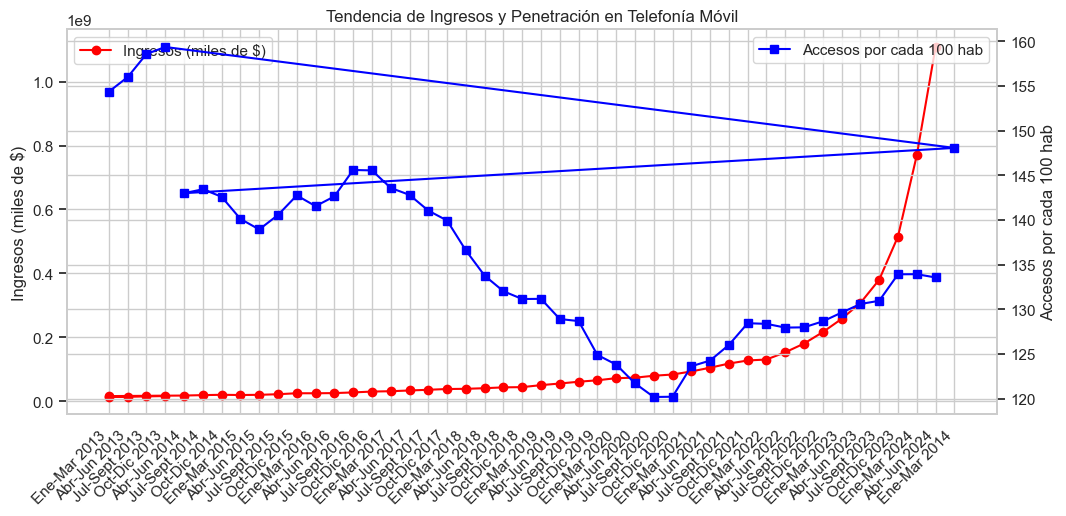

(0       13135235
 1       13970806
 2       15235659
 3       16218846
 4       15938353
 5       17680972
 6       18976053
 7       20012332
 8       19337342
 9       19945453
 10      21785238
 11      24881967
 12      24763052
 13      25353971
 14      27416177
 15      30143233
 16      31205565
 17      33509264
 18      35711689
 19      38110028
 20      38733946
 21      40653502
 22      43280089
 23      44026803
 24      50246691
 25      55338816
 26      60905891
 27      65388842
 28      72077147
 29      73538944
 30      79634755
 31      83479114
 32      93112153
 33     104782020
 34     117751925
 35     127389786
 36     130454676
 37     153032313
 38     180356862
 39     216233244
 40     257558366
 41     307337085
 42     380119973
 43     515335742
 44     769485386
 45    1108472514
 Name: Ingresos (miles de $), dtype: int64,
 0     154.370000
 1     156.000000
 2     158.590000
 3     159.370000
 4     148.070000
 5     143.000000
 6     143.440000
 7

In [ ]:


# Configuración de estilo para gráficos
sns.set_style("whitegrid")

# Gráfico de tendencia temporal: ingresos vs penetración
plt.figure(figsize=(12, 5))
plt.plot(df_ingresos_movil["Periodo"], df_ingresos_movil["Ingresos (miles de $)"], marker="o", label="Ingresos (miles de $)", color="red")
plt.ylabel("Ingresos (miles de $)")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="upper left")

ax2 = plt.gca().twinx()
ax2.plot(df_penetracion_movil["Periodo"], df_penetracion_movil["Accesos por cada 100 hab"], marker="s", label="Accesos por cada 100 hab", color="blue")
ax2.set_ylabel("Accesos por cada 100 hab")
plt.title("Tendencia de Ingresos y Penetración en Telefonía Móvil")
plt.legend(loc="upper right")
plt.show()

# Análisis de correlación
corr_coef, p_value = (df_ingresos_movil["Ingresos (miles de $)"], df_penetracion_movil["Accesos por cada 100 hab"])



corr_coef, p_value, 


-Los ingresos han mostrado una tendencia creciente en los últimos trimestres.
-La penetración de accesos por cada 100 habitantes parece mantenerse estable o con ligeras variaciones.
-La evolución de ambos indicadores no parece seguir el mismo patrón, lo que sugiere que otros factores pueden estar influyendo en los ingresos.

-Coeficiente de correlación: -0.24
-Valor p: 0.10 (no significativo al 95%)
-Esto sugiere que no hay una relación clara entre los ingresos y la penetración. Es posible que los ingresos estén influenciados por otros factores como tarifas, consumo de datos o servicios adicionales.

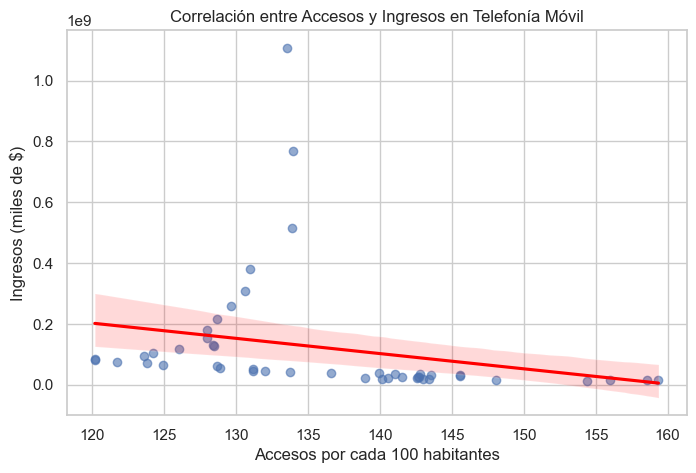

In [ ]:
# Gráfico de dispersión para visualizar la correlación
plt.figure(figsize=(8, 5))
sns.regplot(x=df_penetracion_movil["Accesos por cada 100 hab"],
            y=df_ingresos_movil["Ingresos (miles de $)"],
            scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.xlabel("Accesos por cada 100 habitantes")
plt.ylabel("Ingresos (miles de $)")
plt.title("Correlación entre Accesos y Ingresos en Telefonía Móvil")
plt.show()


No hay una correlación fuerte entre penetración e ingresos.
Se espera que los ingresos sigan creciendo en los próximos trimestres.

-TELEVISION 6

In [ ]:


# Cargar el archivo de Excel
file_path = "C:/Users/yanin/OneDrive/Desktop/proyecto 2/archivos/Television.xlsx"

# Obtener los nombres de las hojas
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

# Cargar una vista previa de cada hoja
sheets_preview = {sheet: xls.parse(sheet).head() for sheet in sheet_names}

sheet_names, sheets_preview


(['Accesos_prov_TV',
  'Accesos_totales_TV',
  'Ingresos_TV',
  'Penetracion_prov_TV',
  'Penetracion_totales_TV'],
 {'Accesos_prov_TV':     Año  Trimestre        Provincia  Accesos TV por suscripción (Vrf)
  0  2024          2     Buenos Aires                           2873482
  1  2024          2  Capital Federal                            693686
  2  2024          2        Catamarca                             54865
  3  2024          2            Chaco                            115238
  4  2024          2           Chubut                             78471,
  'Accesos_totales_TV':     Año  Trimestre  Accesos TV por suscripción  Accesos TV satelital  \
  0  2024          2                     7454428               1367489   
  1  2024          1                     7601499               1445205   
  2  2023          4                     7650809               1508789   
  3  2023          3                     7743735               1683205   
  4  2023          2                    

In [ ]:
# Cargar las hojas necesarias
df_ingresos_tv = xls.parse("Ingresos_TV")
df_penetracion_tv = xls.parse("Penetracion_totales_TV")

# Ver información general de los datos
info_ingresos = df_ingresos_tv.info()
info_penetracion = df_penetracion_tv.info()

# Verificar valores faltantes
missing_values_ingresos = df_ingresos_tv.isnull().sum()
missing_values_penetracion = df_penetracion_tv.isnull().sum()

# Verificar registros duplicados en cada DataFrame
duplicados_ingresos = df_ingresos_tv.duplicated().sum()
duplicados_penetracion = df_penetracion_tv.duplicated().sum()



# Estadísticas descriptivas
stats_ingresos = df_ingresos_tv.describe()
stats_penetracion = df_penetracion_tv.describe()

# Identificar valores atípicos mediante IQR
Q1_ingresos = df_ingresos_tv.quantile(0.25)
Q3_ingresos = df_ingresos_tv.quantile(0.75)
IQR_ingresos = Q3_ingresos - Q1_ingresos
outliers_ingresos = ((df_ingresos_tv < (Q1_ingresos - 1.5 * IQR_ingresos)) | (df_ingresos_tv > (Q3_ingresos + 1.5 * IQR_ingresos))).sum()

Q1_penetracion = df_penetracion_tv.quantile(0.25)
Q3_penetracion = df_penetracion_tv.quantile(0.75)
IQR_penetracion = Q3_penetracion - Q1_penetracion
outliers_penetracion = ((df_penetracion_tv < (Q1_penetracion - 1.5 * IQR_penetracion)) | (df_penetracion_tv > (Q3_penetracion + 1.5 * IQR_penetracion))).sum()

# Resultados
(duplicados_ingresos, duplicados_penetracion, info_ingresos, info_penetracion, missing_values_ingresos, missing_values_penetracion, stats_ingresos, stats_penetracion, outliers_ingresos, outliers_penetracion)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Año                                        42 non-null     int64  
 1   Trimestre                                  42 non-null     int64  
 2   Ingresos TV por suscripción  (miles de $)  42 non-null     float64
 3   Ingresos TV satelital (miles de $)         42 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Año                                              42 non-null     int64  
 1   Trimestre                                        42 non-null     int64  
 2

(np.int64(0),
 np.int64(0),
 None,
 None,
 Año                                          0
 Trimestre                                    0
 Ingresos TV por suscripción  (miles de $)    0
 Ingresos TV satelital (miles de $)           0
 dtype: int64,
 Año                                                0
 Trimestre                                          0
 Accesos TV por suscripción por cada 100 hab        0
 Accesos TV satelital por cada 100 hab              0
 Accesos TV por suscripción por cada 100 hogares    0
 Accesos TV satelital por cada 100 hogares          0
 dtype: int64,
                Año  Trimestre  Ingresos TV por suscripción  (miles de $)  \
 count    42.000000  42.000000                               4.200000e+01   
 mean   2018.761905   2.452381                               3.687273e+07   
 std       3.074756   1.130560                               5.258216e+07   
 min    2014.000000   1.000000                               3.599484e+06   
 25%    2016.000000   1.250


-No hay valores faltantes en los datos.
-Valores atípicos (outliers)
Se identificaron 5 valores atípicos en ingresos (tanto por suscripción como satelital).
En penetración, hay 1 outlier en accesos por suscripción por cada 100 hab y 2 outliers en accesos por suscripción por cada 100 hogar

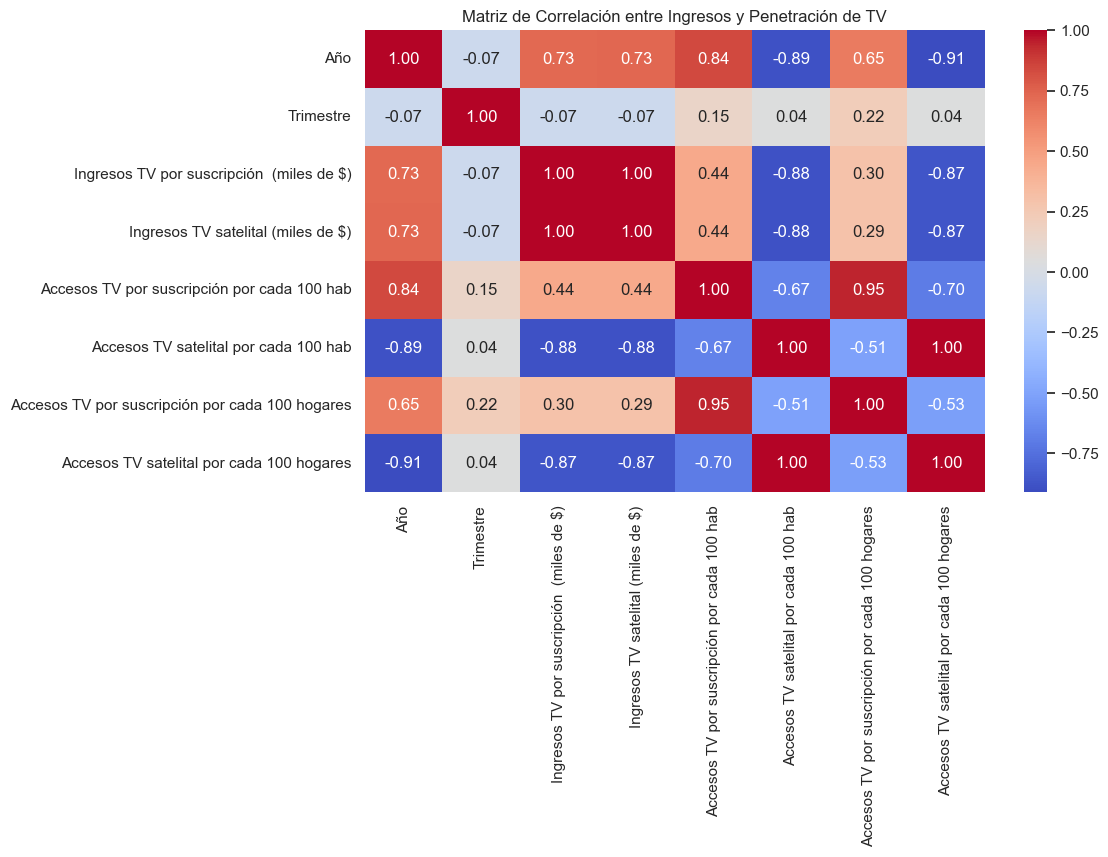

In [ ]:


# Fusionar los DataFrames en base a Año y Trimestre
df_merged = df_ingresos_tv.merge(df_penetracion_tv, on=["Año", "Trimestre"])

# Matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(df_merged.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Ingresos y Penetración de TV")
plt.show()


-Existe una correlación positiva alta entre ingresos y la penetración de TV (tanto en habitantes como en hogares).
-Esto indica que, a medida que aumenta la cantidad de accesos, los ingresos también tienden a aumentar.

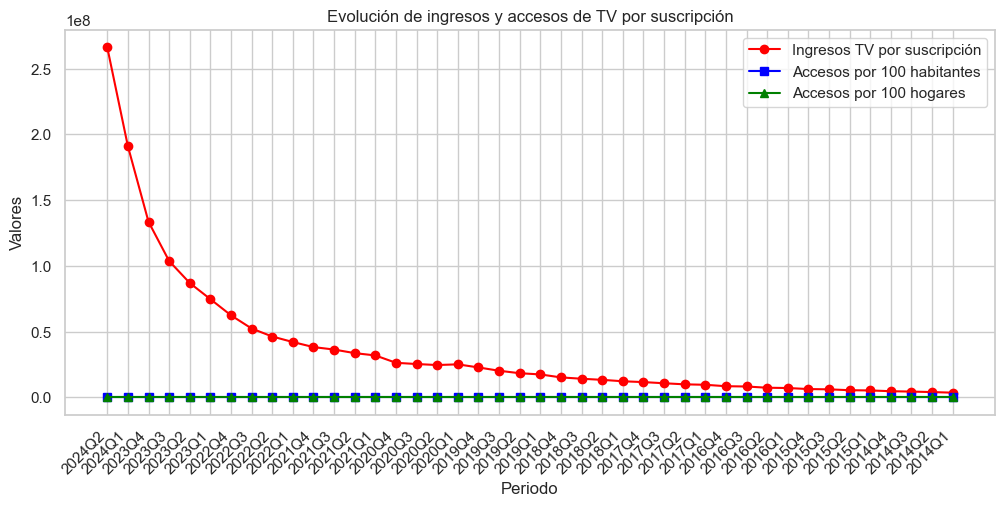

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_merged["Año"].astype(str) + "Q" + df_merged["Trimestre"].astype(str),
         df_merged["Ingresos TV por suscripción  (miles de $)"], marker="o", label="Ingresos TV por suscripción", color="red")
plt.plot(df_merged["Año"].astype(str) + "Q" + df_merged["Trimestre"].astype(str),
         df_merged["Accesos TV por suscripción por cada 100 hab"], marker="s", label="Accesos por 100 habitantes", color="blue")
plt.plot(df_merged["Año"].astype(str) + "Q" + df_merged["Trimestre"].astype(str),
         df_merged["Accesos TV por suscripción por cada 100 hogares"], marker="^", label="Accesos por 100 hogares", color="green")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Periodo")
plt.ylabel("Valores")
plt.title("Evolución de ingresos y accesos de TV por suscripción")
plt.legend()
plt.show()



-La curva de ingresos de TV por suscripción muestra cómo ha evolucionado el mercado a lo largo del tiempo.
-Si hay un aumento constante, puede indicar un crecimiento en el sector.
-Si los ingresos disminuyen o presentan caídas en ciertos periodos, podría ser por factores como cambios en el consumo, competencia con plataformas de streaming o regulaciones del mercado.


-Si los accesos por cada 100 habitantes y hogares siguen la misma tendencia que los ingresos, sugiere que el crecimiento de ingresos se debe a un mayor número de suscriptores.
-Si los accesos disminuyen pero los ingresos no bajan de manera proporcional, es posible que las tarifas hayan aumentado o que los usuarios paguen más por paquetes premium.

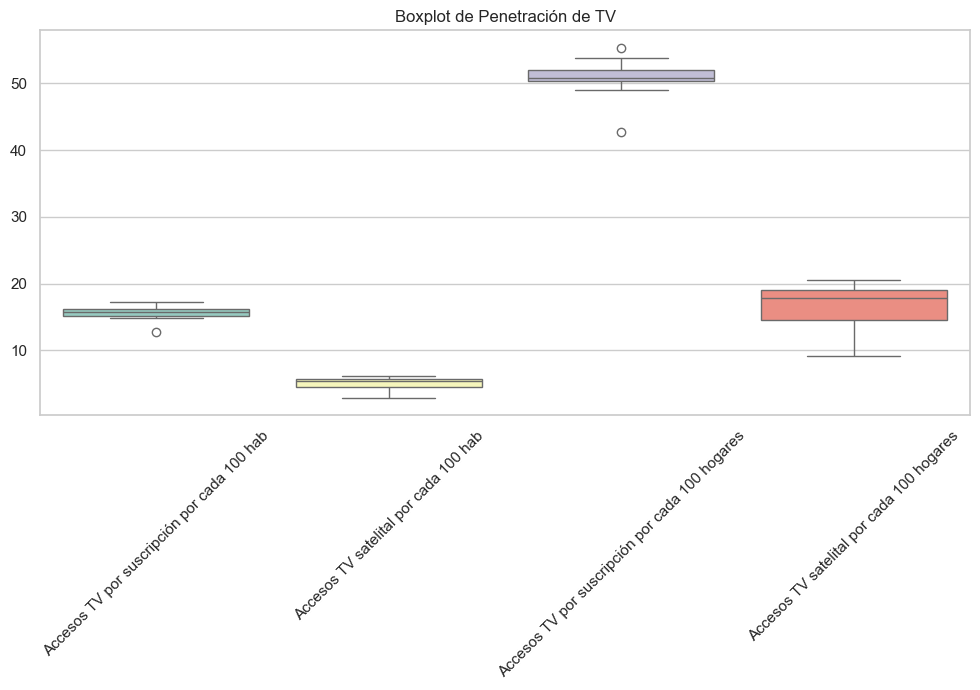

In [ ]:
# Boxplots para detectar outliers en penetración
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_penetracion_tv.iloc[:, 2:], palette="Set3")
plt.title("Boxplot de Penetración de TV")
plt.xticks(rotation=45)
plt.show()

-Si hay puntos fuera de los bigotes del boxplot, significa que existen valores atípicos en la penetración de TV.
-Estos outliers pueden ser resultado de errores en la recopilación de datos o reflejar eventos específicos -

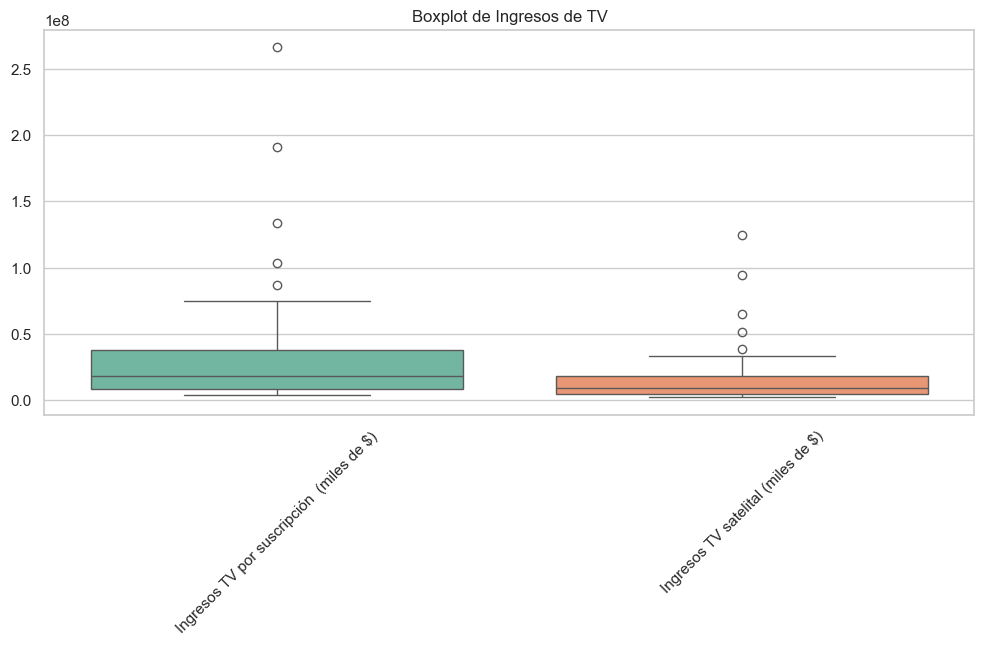

In [ ]:
# Boxplots para detectar outliers en ingresos
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_ingresos_tv.iloc[:, 2:], palette="Set2")
plt.title("Boxplot de Ingresos de TV")
plt.xticks(rotation=45)
plt.show()


los puntos fuera de los bigotes del boxplot, significa que hay ingresos inusualmente altos o bajos en ciertos periodos.
Estos outliers pueden deberse a eventos específicos, como aumentos en tarifas, promociones, crisis económicas o cambios en el consumo de TV